In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [22]:
# Create dataframe
ue_rate = pd.read_csv('../data/UNRATE.csv')

In [23]:
# Investigate variables
ue_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    867 non-null    object 
 1   UNRATE  867 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.7+ KB


In [24]:
# First five records
ue_rate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


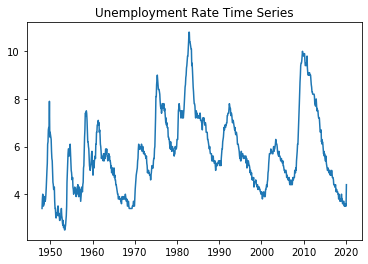

In [25]:
ue_rate.index = pd.to_datetime(ue_rate['DATE'])
plt.plot(ue_rate['UNRATE'])
plt.title('Unemployment Rate Time Series')
plt.show()

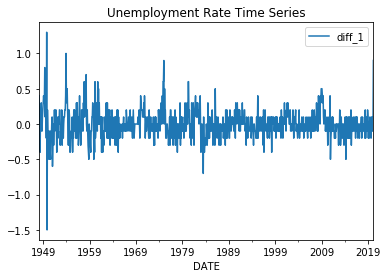

In [30]:
# Plotting the difference
ue_rate['diff_1'] = ue_rate['UNRATE'] - ue_rate['UNRATE'].shift()
ue_rate.plot(y='diff_1')
plt.title('Unemployment Rate Time Series')
plt.show()

Text(0.5, 1.0, 'Unemployment Rate PACF')

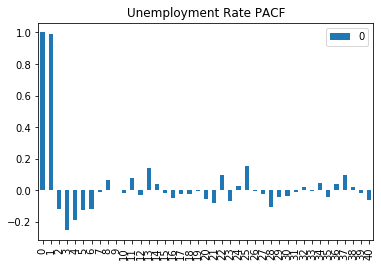

In [31]:
# Investigate PACF for Initial
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(ue_rate['UNRATE']))
x_acf.plot(kind='bar')
plt.title('Unemployment Rate PACF')

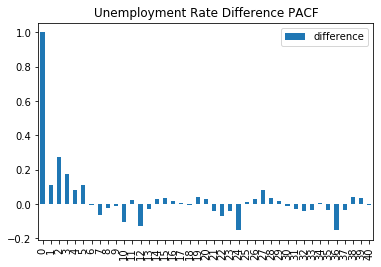

In [32]:
# Investigate PACF for Difference
x_acf = pd.DataFrame(pacf(ue_rate['diff_1'][1:]))
x_acf.plot(kind='bar')
plt.title('Unemployment Rate Difference PACF')
plt.legend(['difference'])

In [34]:
# ARIMA 0, 1, 0
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ue_rate['UNRATE'], order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 123.534
Method:                           css   S.D. of innovations              0.210
Date:                Fri, 10 Apr 2020   AIC                           -243.069
Time:                        20:10:22   BIC                           -233.541
Sample:                    02-01-1948   HQIC                          -239.423
                         - 03-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.007      0.162      0.871      -0.013       0.015
Residuals Description
count    8.660000e+02
mean     1.835128e-09
std      2.099239e-01
min     -1.501155e+00
25%     -1.011547e-01

D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
# ARIMA 1, 0, 0
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ue_rate['UNRATE'], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  867
Model:                     ARMA(1, 0)   Log Likelihood                 123.342
Method:                       css-mle   S.D. of innovations              0.209
Date:                Fri, 10 Apr 2020   AIC                           -240.685
Time:                        20:13:11   BIC                           -226.390
Sample:                    01-01-1948   HQIC                          -235.214
                         - 03-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3153      0.813      6.541      0.000       3.722       6.908
ar.L1.UNRATE     0.9921      0.004    247.546      0.000       0.984       1.000
                                    Roots   

D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
# ARIMA 1, 0, 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ue_rate['UNRATE'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  867
Model:                     ARMA(1, 1)   Log Likelihood                 127.034
Method:                       css-mle   S.D. of innovations              0.208
Date:                Fri, 10 Apr 2020   AIC                           -246.068
Time:                        20:14:17   BIC                           -227.008
Sample:                    01-01-1948   HQIC                          -238.774
                         - 03-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3627      0.765      7.008      0.000       3.863       6.863
ar.L1.UNRATE     0.9909      0.004    227.015      0.000       0.982       1.000
ma.L1.UNRATE     0.0762      0.028      2.70

In [37]:
# ARIMA 5, 1, 5
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ue_rate['UNRATE'], order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 198.708
Method:                       css-mle   S.D. of innovations              0.192
Date:                Fri, 10 Apr 2020   AIC                           -373.416
Time:                        20:15:04   BIC                           -316.250
Sample:                    02-01-1948   HQIC                          -351.538
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0025      0.011      0.221      0.825      -0.020       0.025
ar.L1.D.UNRATE     0.0522      0.694      0.075      0.940      -1.308       1.412
ar.L2.D.UNRATE     0.4329      0.415

In [38]:
# ARIMA 1, 1, 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ue_rate['UNRATE'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Users\bengriffith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 162.627
Method:                       css-mle   S.D. of innovations              0.201
Date:                Fri, 10 Apr 2020   AIC                           -317.254
Time:                        20:25:05   BIC                           -298.198
Sample:                    02-01-1948   HQIC                          -309.961
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0029      0.015      0.194      0.846      -0.026       0.032
ar.L1.D.UNRATE     0.8707      0.030     29.348      0.000       0.813       0.929
ma.L1.D.UNRATE    -0.7180      0.038

- ARIMA(0, 1, 0) AIC: -243.069
- ARIMA(1, 0, 0) AIC: -240.685
- ARIMA(1, 0, 1) AIC: -246.068
- ARIMA(5, 1, 5) AIC: -373.416
- ARIMA(1, 1, 1) AIC: -317.254